### Estudo com Análise de Crimes de Ódio (2017-2025)

Objetivo da Análise
O objetivo é explorar o conjunto de dados sobre crimes de ódio para entender padrões, tendências e as principais características desses incidentes.

Perguntas a Serem Respondidas
    Antes de começar, vamos definir algumas perguntas que guiarão nossa análise:

Tendência Temporal: 
    Como o número de crimes de ódio evoluiu ao longo dos anos presentes no dataset?

Distribuição Geográfica: 
    Quais estados apresentam os maiores números de registros de crimes de ódio?

Motivações Principais:
    Quais são as motivações de preconceito (viés) mais comuns por trás desses crimes?

Tipos de Ofensa:
    Quais são os tipos de ofensa (crime) mais frequentemente reportados?

Relação Agência x Crimes:
    Existe alguma diferença significativa no número de crimes reportados por tipo de agência (ex: polícia da cidade, xerife do condado)?

#### Configuração do Ambiente e Carregamento dos Dados

In [1]:
# Importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurando o estilo dos gráficos para melhor visualização
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Carregando o dataset
# Certifique-se de que o arquivo 'Hate_Crimes_2017-2025.csv' está na mesma pasta do seu notebook
# ou forneça o caminho completo para o arquivo.
try:
    df = pd.read_csv('Hate_Crimes_2017-2025.csv')
    print("Arquivo carregado com sucesso!")
except FileNotFoundError:
    print("Erro: Arquivo não encontrado. Verifique o nome e o caminho do arquivo.")

Arquivo carregado com sucesso!


#### Análise Exploratória de Dados (EDA)

In [2]:
# 1. Visualizar as primeiras linhas do DataFrame
print("Amostra dos dados:")
display(df.head())

Amostra dos dados:


,Month,Incident Number,Date of Incident,Day of Week,Number of Victims under 18,Number of Victims over 18,Number of Offenders under 18,Number of Offenders over 18,Race/Ethnicity of Offenders,Offense(s),Offense Location,Bias,Zip Code,APD Sector,Council District
0,Jan,2017-241137,01/01/2017 12:00:00 AM,Sun,0,1,0,1,White/Not Hispanic,Aggravated Assault,Park/Playground,Anti-Black or African American,78704.0,Henry,9.0
1,Feb,2017-580344,02/01/2017 12:00:00 AM,Wed,0,1,0,1,Black or African American/Not Hispanic,Aggravated Assault,Highway/Road/Alley/Street/Sidewalk,Anti-White,78702.0,Charlie,1.0
2,Mar,2017-800291,03/21/2017 12:00:00 AM,Tue,0,0,0,0,Unknown,Destruction,Highway/Road/Alley/Street/Sidewalk,Anti-Jewish,78757.0,Ida,7.0
3,Apr,2017-1021534,04/12/2017 12:00:00 AM,Wed,0,0,0,0,White/Unknown,Simple Assault,Air/Bus/Train Terminal,Anti-Jewish,78723.0,Ida,1.0
4,May,2017-1351550,05/15/2017 12:00:00 AM,Mon,1,0,1,2,White/Not Hispanic,Simple Assault,Residence/Home,Anti-Gay (Male),78750.0,Adam,6.0


In [3]:
# 2. Obter informações sobre as colunas, tipos de dados e valores nulos
print("\nInformações do DataFrame:")
df.info()


Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Month                         266 non-null    object 
 1   Incident Number               266 non-null    object 
 2   Date of Incident              266 non-null    object 
 3   Day of Week                   266 non-null    object 
 4   Number of Victims under 18    266 non-null    object 
 5   Number of Victims over 18     266 non-null    object 
 6   Number of Offenders under 18  266 non-null    object 
 7   Number of Offenders over 18   264 non-null    object 
 8   Race/Ethnicity of Offenders   266 non-null    object 
 9   Offense(s)                    266 non-null    object 
 10  Offense Location              266 non-null    object 
 11  Bias                          266 non-null    object 
 12  Zip Code                      265 non

In [4]:
# 3. Gerar estatísticas descritivas para as colunas numéricas
print("\nEstatísticas Descritivas:")
display(df.describe())


Estatísticas Descritivas:


,Zip Code,Council District
count,265.000000,265.000000
mean,78727.664151,6.018868
std,25.630024,3.021956
min,78613.000000,1.000000
25%,78704.000000,3.000000
50%,78731.000000,7.000000
75%,78750.000000,9.000000
max,78759.000000,10.000000


In [5]:
# 4. Verificar a contagem de valores nulos em cada coluna
print("\nContagem de valores nulos por coluna:")
print(df.isnull().sum())


Contagem de valores nulos por coluna:
Month                           0
Incident Number                 0
Date of Incident                0
Day of Week                     0
Number of Victims under 18      0
Number of Victims over 18       0
Number of Offenders under 18    0
Number of Offenders over 18     2
Race/Ethnicity of Offenders     0
Offense(s)                      0
Offense Location                0
Bias                            0
Zip Code                        1
APD Sector                      1
Council District                1
dtype: int64


In [6]:
# 5. Listar os nomes das colunas para facilitar a referência
print("\nNomes das colunas:")
print(df.columns)


Nomes das colunas:
Index(['Month', 'Incident Number', 'Date of Incident', 'Day of Week',
       'Number of Victims under 18', 'Number of Victims over 18',
       'Number of Offenders under 18', 'Number of Offenders over 18',
       'Race/Ethnicity of Offenders', 'Offense(s)', 'Offense Location', 'Bias',
       'Zip Code', 'APD Sector', 'Council District'],
      dtype='object')


#### Análises Gráficas para Responder às Perguntas

Pergunta 1: Como o número de crimes de ódio evoluiu ao longo dos anos?

C:\Users\paulo\AppData\Local\Temp\ipykernel_28964\2905694916.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date of Incident'] = pd.to_datetime(df['Date of Incident'])


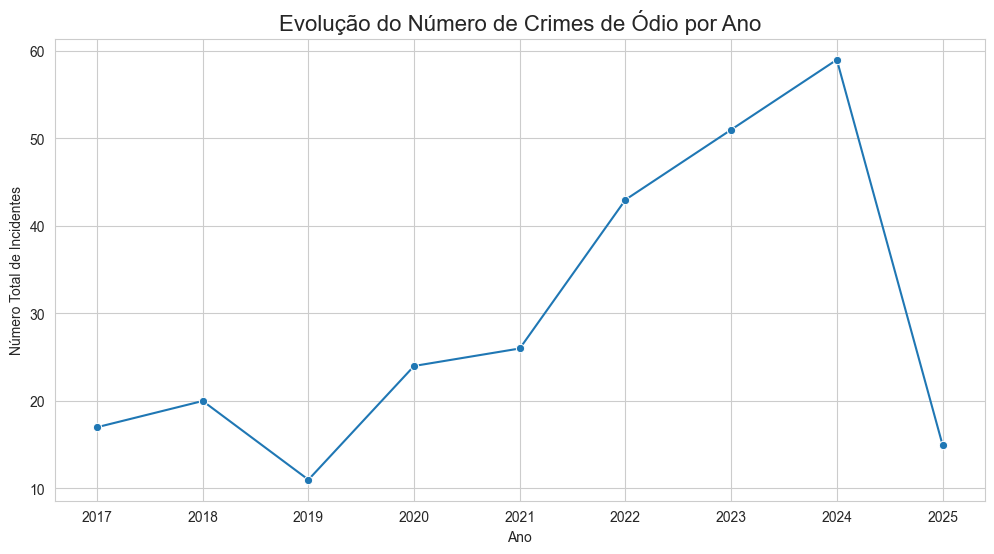

In [7]:
# 1. Converter a coluna de data para o formato datetime
df['Date of Incident'] = pd.to_datetime(df['Date of Incident'])

# 2. Extrair o ano para uma nova coluna 'Year'
df['Year'] = df['Date of Incident'].dt.year

# 3. Agrupar os dados pela nova coluna 'Year'
crimes_por_ano = df.groupby('Year').size().reset_index(name='Total_Incidentes')

# Criando o gráfico de linhas
plt.figure(figsize=(12, 6))
sns.lineplot(data=crimes_por_ano, x='Year', y='Total_Incidentes', marker='o')

plt.title('Evolução do Número de Crimes de Ódio por Ano', fontsize=16)
plt.xlabel('Ano')
plt.ylabel('Número Total de Incidentes')
plt.xticks(crimes_por_ano['Year'])
plt.grid(True)
plt.show()

Pergunta 2: Quais estados apresentam os maiores números de registros?

C:\Users\paulo\AppData\Local\Temp\ipykernel_28964\496851007.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=crimes_por_distrito, x='Total_Incidentes', y='Distrito', palette='viridis', orient='h')


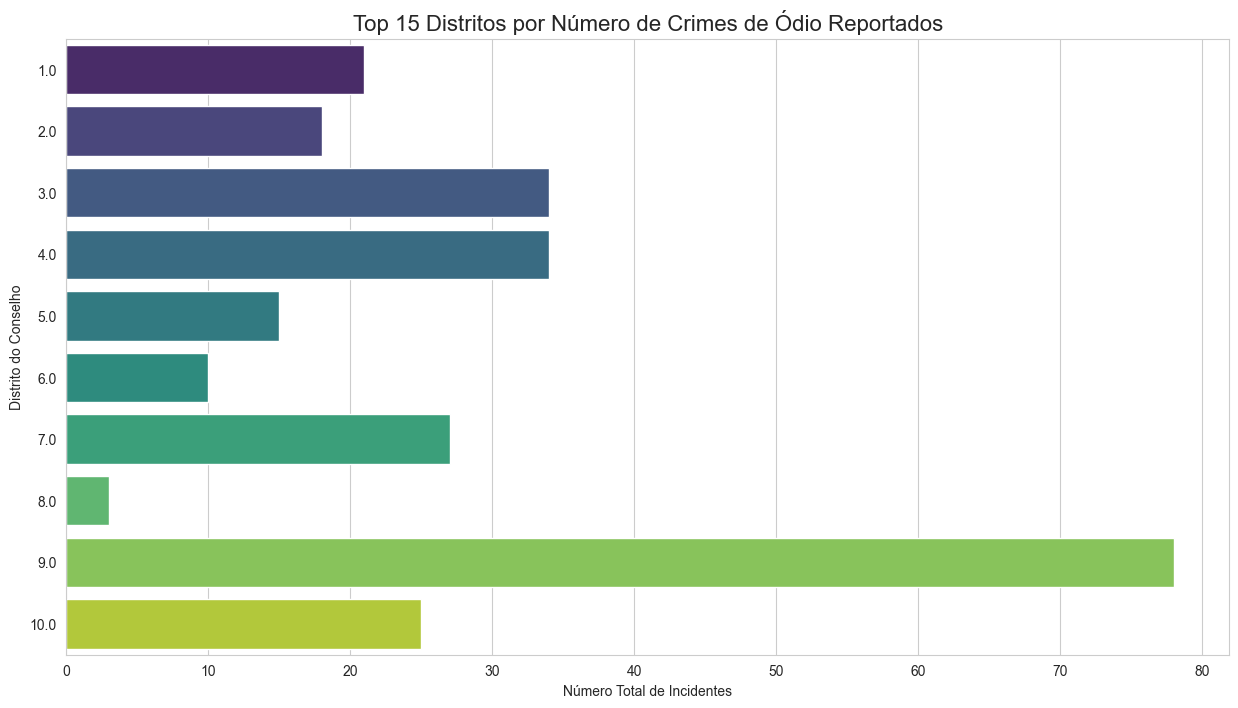

In [8]:
# Contando os incidentes por Distrito do Conselho
crimes_por_distrito = df['Council District'].value_counts().nlargest(15).reset_index()
crimes_por_distrito.columns = ['Distrito', 'Total_Incidentes']

# Criando o gráfico de barras
plt.figure(figsize=(15, 8))
sns.barplot(data=crimes_por_distrito, x='Total_Incidentes', y='Distrito', palette='viridis', orient='h')

plt.title('Top 15 Distritos por Número de Crimes de Ódio Reportados', fontsize=16)
plt.xlabel('Número Total de Incidentes')
plt.ylabel('Distrito do Conselho')
plt.show()

Pergunta 3: Quais são as motivações de preconceito (viés) mais comuns?

C:\Users\paulo\AppData\Local\Temp\ipykernel_28964\2966859005.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=motivacao, x='Total_Incidentes', y='Motivacao', palette='mako')


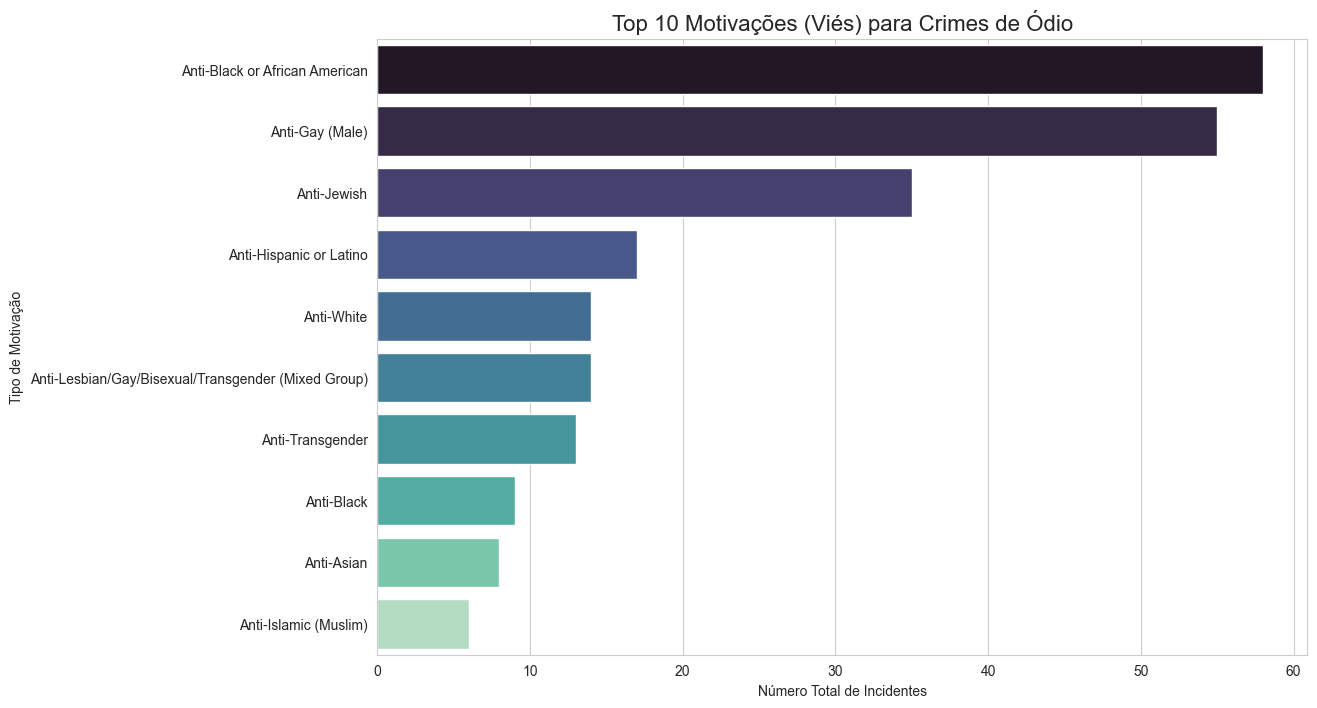

In [9]:
# Contando os incidentes por tipo de motivação (usando a coluna 'Bias')
motivacao = df['Bias'].value_counts().nlargest(10).reset_index()
motivacao.columns = ['Motivacao', 'Total_Incidentes']

# Criando o gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(data=motivacao, x='Total_Incidentes', y='Motivacao', palette='mako')

plt.title('Top 10 Motivações (Viés) para Crimes de Ódio', fontsize=16)
plt.xlabel('Número Total de Incidentes')
plt.ylabel('Tipo de Motivação')
plt.show()

Pergunta 4: Quais são os tipos de ofensa mais frequentemente reportados?

C:\Users\paulo\AppData\Local\Temp\ipykernel_28964\2507283831.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tipo_ofensa, x='Total_Incidentes', y='Tipo_de_Ofensa', palette='rocket')


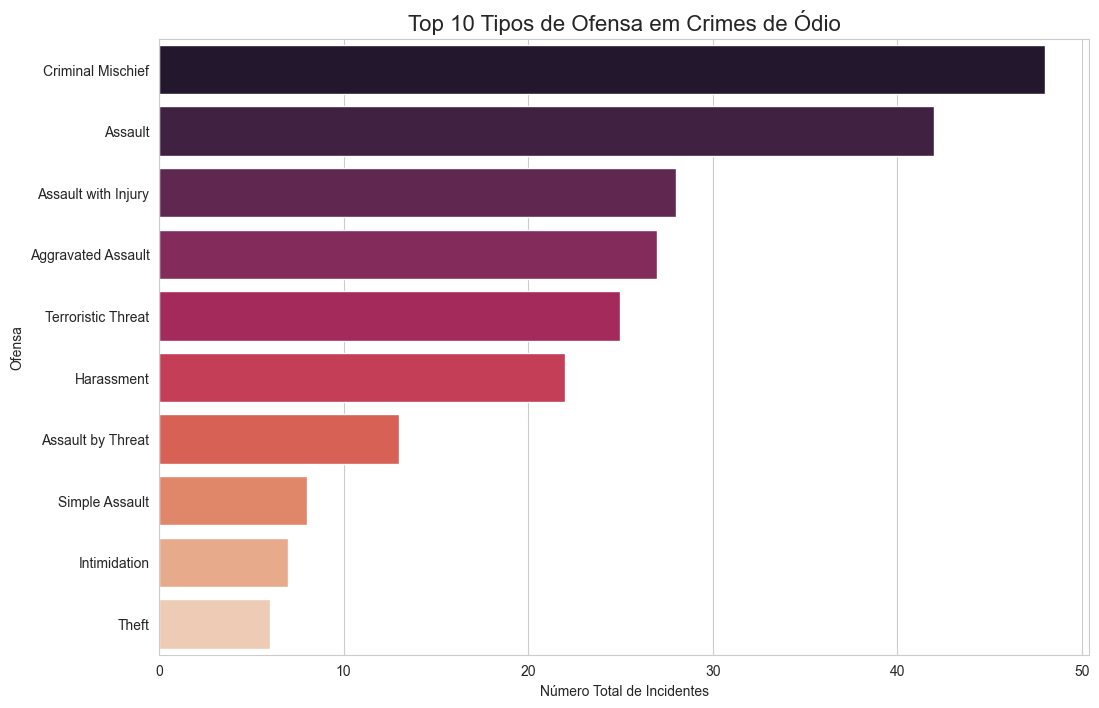

In [10]:
# Contando os incidentes por tipo de ofensa (usando a coluna 'Offense(s)')
tipo_ofensa = df['Offense(s)'].value_counts().nlargest(10).reset_index()
tipo_ofensa.columns = ['Tipo_de_Ofensa', 'Total_Incidentes']

# Criando o gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(data=tipo_ofensa, x='Total_Incidentes', y='Tipo_de_Ofensa', palette='rocket')

plt.title('Top 10 Tipos de Ofensa em Crimes de Ódio', fontsize=16)
plt.xlabel('Número Total de Incidentes')
plt.ylabel('Ofensa')
plt.show()

Pergunta 5: Existe diferença no número de crimes reportados por tipo de agência?

C:\Users\paulo\AppData\Local\Temp\ipykernel_28964\213320123.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=crimes_por_setor, x='Setor_Policial', y='Total_Incidentes', palette='cubehelix')


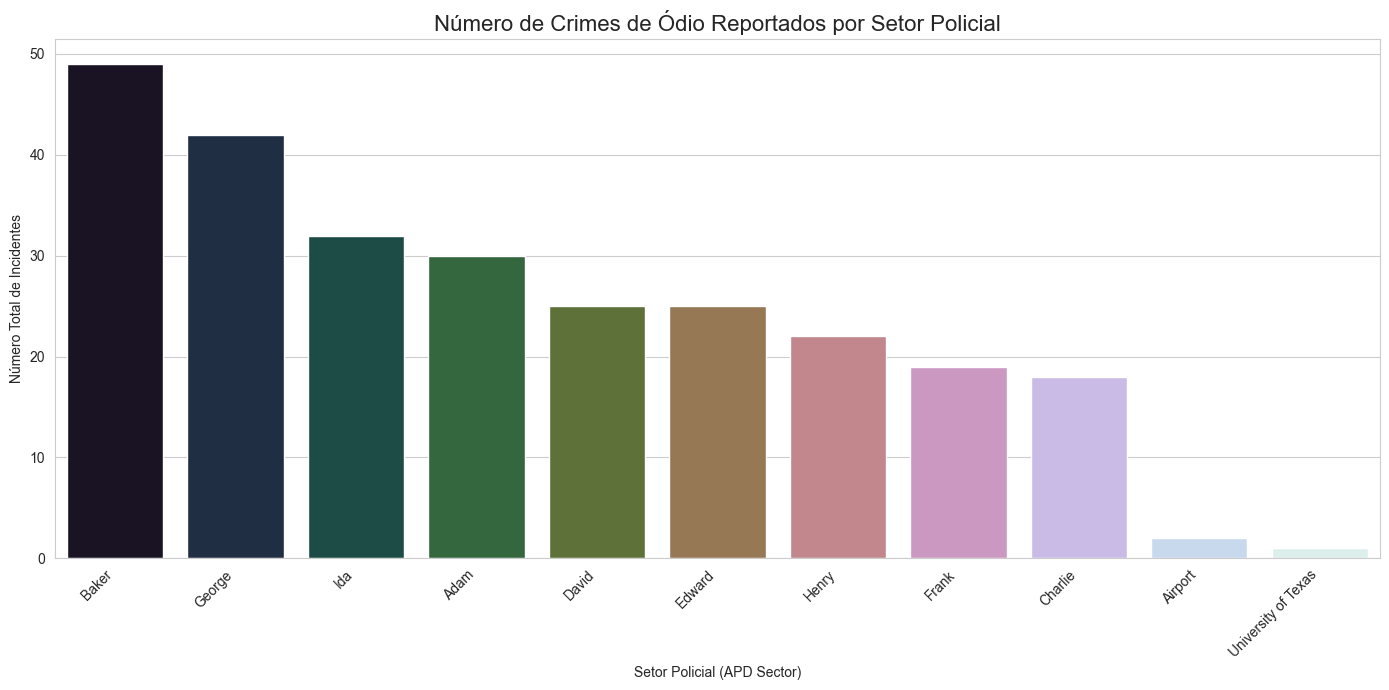

In [11]:
# Agrupando por Setor Policial (usando 'APD Sector')
crimes_por_setor = df['APD Sector'].value_counts().reset_index()
crimes_por_setor.columns = ['Setor_Policial', 'Total_Incidentes']

# Criando o gráfico de barras
plt.figure(figsize=(14, 7))
sns.barplot(data=crimes_por_setor, x='Setor_Policial', y='Total_Incidentes', palette='cubehelix')

plt.title('Número de Crimes de Ódio Reportados por Setor Policial', fontsize=16)
plt.xlabel('Setor Policial (APD Sector)')
plt.ylabel('Número Total de Incidentes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()